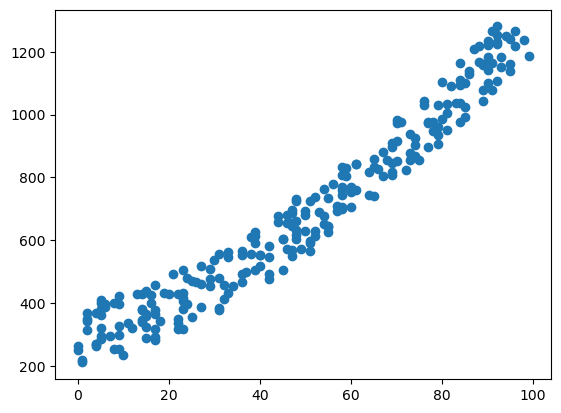

In [12]:
import numpy as np
import matplotlib.pyplot as plt
n=250
X = np.random.randint(0, 100, n)
Y = X**1.5 + np.random.randint(200, 400, n)
plt.scatter(X, Y)
plt.show()

In [13]:
def averageCost(m, q):
    return np.mean(np.sqrt(np.square(Y - q - m*X)))

In [32]:
m, q = 0, 0
alpha = 1

norm = 2 # just to start the while
for _ in range(200000):
    gradient_m = np.sum(-2 * (Y - q - m*X) * X)
    gradient_q = np.sum(-2 * (Y - q - m*X))

    costNow = averageCost(m, q)
    costThen = averageCost(m-(gradient_m*alpha), q-(gradient_q*alpha))
    while costThen>costNow:
        alpha /= 2
        costThen = averageCost(m-(gradient_m*alpha), q-(gradient_q*alpha))
    m -= gradient_m*alpha
    q -= gradient_q*alpha
    alpha*=1.5        
norm = np.sqrt((gradient_m**2)+(gradient_q**2))    
print("average cost:", averageCost(m,q))
print("gradient norm:", norm)
print("m:" , m , "q:" , q)

average cost: 93.76489496163468
gradient norm: 28544.10915267839
m: 13.043603748047323 q: 0.3075076854721033


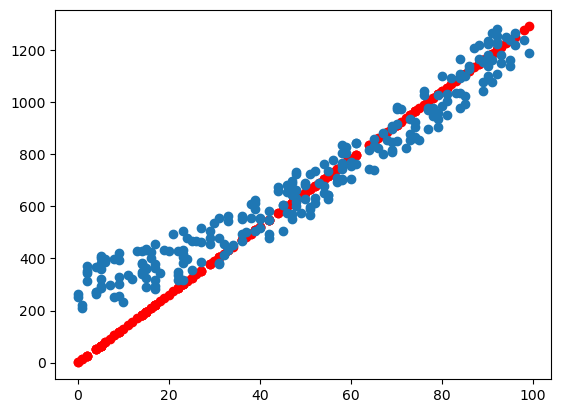

In [24]:
plt.scatter(X, m * X + q, color="red")
plt.scatter(X, Y)
plt.show()

average cost: 57.95846131557474


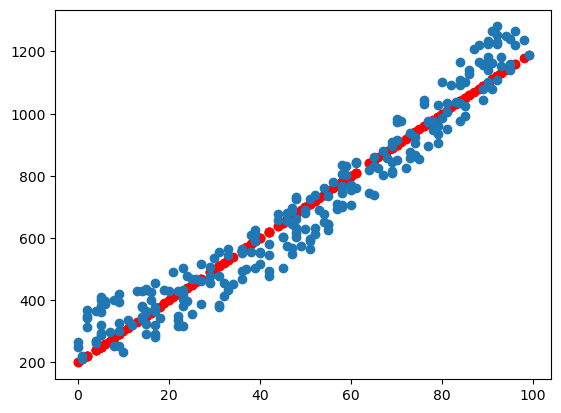

In [31]:
q=200
m=10
print("average cost:", averageCost(m,q))
plt.scatter(X, m * X + q, color="red")
plt.scatter(X, Y)
plt.show()